# Deliverable 3.3: Position Tracking with PI Controller

## Objective
Bring the rocket from high altitude and velocity `[50, 50, 100]m` to a stationary point `[0, 0, 10]m` with `roll = 0°`, from which a controlled landing can be executed.

## Control Architecture
**Cascaded PI-MPC Control:**
- **Outer loop (PI)**: Computes velocity setpoints from position error
  - Already implemented and tuned in `PIControl.py`
  - Converts position reference → velocity reference
- **Inner loop (MPC)**: Tracks velocity setpoints using reference tracking (`compute_steady_state()`)
  - Uses the implementation from Deliverable 3.2

## Design Procedure
1. **PI Controller**: Use the provided tuned controller with `Kp=0.2`, `Ki=0.0`
2. **MPC Controllers**: Same tuning as Deliverable 3.2 (Horizon = 5s)
3. **Integration**: Pass PI controller to `rocket.simulate_control()` via `pos_control` parameter

The PI controller updates the velocity reference at each timestep based on position error, and the MPC tracks this time-varying velocity reference.

In [4]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# MPC import
from LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [12]:
# Simulation parameters
Ts = 0.05
sim_time = 30  # Increased from 20s to allow full convergence
H = 5.0

# Initial state: high altitude and velocity as specified
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # pos = [50, 50, 100]m

# Target: stationary point at [0, 0, 10]m with roll = 0°
pos_target = np.array([0, 0, 10.0])

# Initialize rocket
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

# Initialize PI position controller (already tuned)
pos_controller = PIControl(pos_target)

# Initialize MPC velocity controller
mpc = MPCVelControl().new_controller(rocket, Ts, H)

print("="*60)
print("DELIVERABLE 3.3 - POSITION TRACKING WITH PI CONTROLLER")
print("="*60)
print(f"\nInitial State:")
print(f"  Position: [{x0[9]:.1f}, {x0[10]:.1f}, {x0[11]:.1f}] m")
print(f"  Velocity: [{x0[6]:.1f}, {x0[7]:.1f}, {x0[8]:.1f}] m/s")
print(f"  Roll: {np.rad2deg(x0[2]):.1f}°")
print(f"\nTarget:")
print(f"  Position: [{pos_target[0]:.1f}, {pos_target[1]:.1f}, {pos_target[2]:.1f}] m")
print(f"  Velocity: [0, 0, 0] m/s (stationary)")
print(f"  Roll: 0°")
print(f"\nSimulating for {sim_time}s...")
print("="*60 + "\n")

# Run closed-loop simulation with PI position controller
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="linear"
)

print("Simulation complete!\n")

# Print final performance
print("="*60)
print("FINAL PERFORMANCE")
print("="*60)
print(f"\nFinal State (at t={t_cl[-1]:.1f}s):")
print(f"  Position: [{x_cl[9,-1]:.3f}, {x_cl[10,-1]:.3f}, {x_cl[11,-1]:.3f}] m")
print(f"  Position error: {np.linalg.norm(x_cl[9:12,-1] - pos_target):.3f} m")
print(f"  Velocity: [{x_cl[6,-1]:.3f}, {x_cl[7,-1]:.3f}, {x_cl[8,-1]:.3f}] m/s")
print(f"  Velocity magnitude: {np.linalg.norm(x_cl[6:9,-1]):.3f} m/s")
print(f"  Roll: {np.rad2deg(x_cl[2,-1]):.3f}°")
print("="*60 + "\n")

# Visualize
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)

DELIVERABLE 3.3 - POSITION TRACKING WITH PI CONTROLLER

Initial State:
  Position: [50.0, 50.0, 100.0] m
  Velocity: [0.0, 0.0, 0.0] m/s
  Roll: 0.0°

Target:
  Position: [0.0, 0.0, 10.0] m
  Velocity: [0, 0, 0] m/s (stationary)
  Roll: 0°

Simulating for 30s...



c:\Users\Julien Mangiatordi\.conda\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


























































































































































































































































































































































































































































































































































































































Simulation complete!

FINAL PERFORMANCE

Final State (at t=30.0s):
  Position: [0.029, 0.029, 10.251] m
  Position error: 0.254 m
  Velocity: [-0.009, -0.009, -0.054] m/s
  Velocity magnitude: 0.055 m/s
  Roll: 0.000°



AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=599, step=2), IntSlider(value=0…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x1c2cc15ef30>,
 'scene_objects': {'rocket_actor': Actor (0x1c2cefb1f00)
    Center:                     (50.32007, 49.9984915, 100.58848449999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    4.936E+01, 5.128E+01
    Y Bounds                    4.879E+01, 5.121E+01
    Z Bo

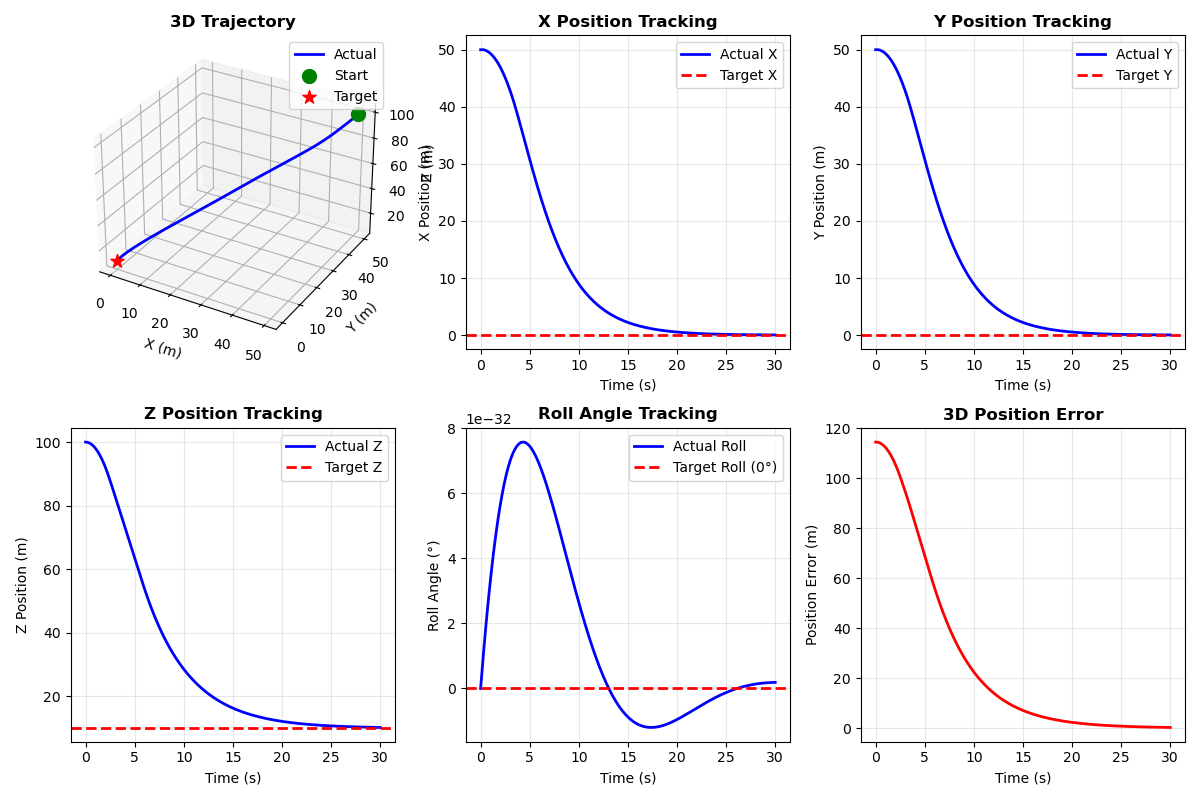

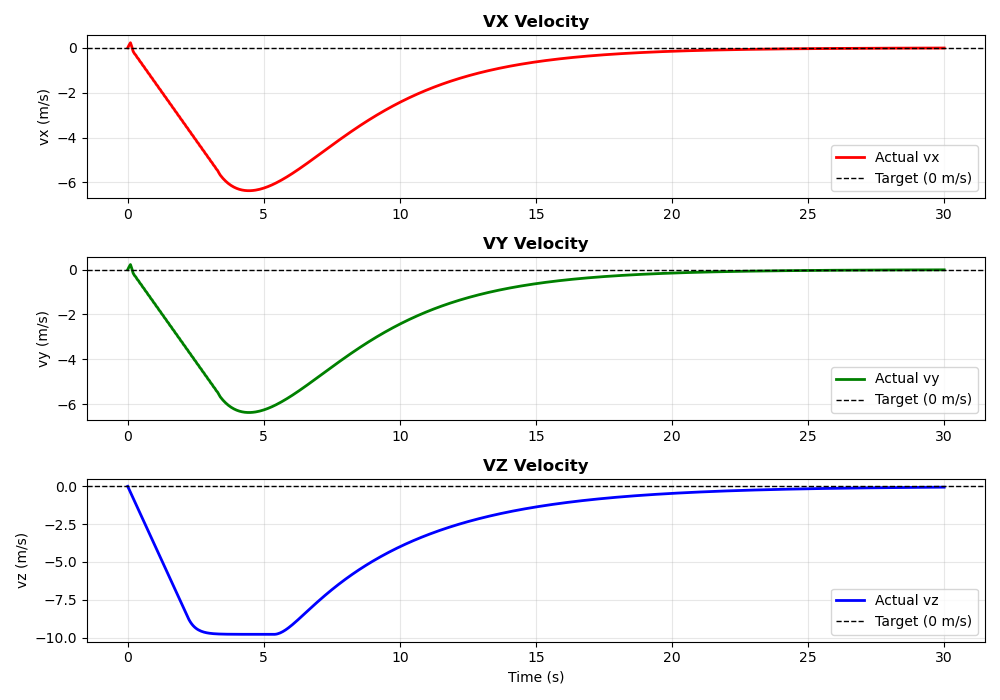

TRACKING PERFORMANCE STATISTICS

Position Error:
  Mean: 26.537 m
  Max:  114.455 m
  Final: 0.254 m

Velocity Magnitude:
  Mean: 3.818 m/s
  Max:  13.303 m/s
  Final: 0.055 m/s

Roll Angle Error:
  Mean: 0.000°
  Max:  0.000°
  Final: 0.000°


In [15]:
# Closed-loop performance plots
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

# Subplot 1: 3D trajectory
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot(x_cl[9, :], x_cl[10, :], x_cl[11, :], 'b-', linewidth=2, label='Actual')
ax1.scatter(x0[9], x0[10], x0[11], c='g', s=100, marker='o', label='Start')
ax1.scatter(pos_target[0], pos_target[1], pos_target[2], c='r', s=100, marker='*', label='Target')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.set_title('3D Trajectory', fontweight='bold')
ax1.legend()
ax1.grid(True)

# Subplot 2: X position
ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(t_cl, x_cl[9, :], 'b-', linewidth=2, label='Actual X')
ax2.axhline(pos_target[0], color='r', linestyle='--', linewidth=2, label='Target X')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('X Position (m)')
ax2.set_title('X Position Tracking', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Y position
ax3 = fig.add_subplot(2, 3, 3)
ax3.plot(t_cl, x_cl[10, :], 'b-', linewidth=2, label='Actual Y')
ax3.axhline(pos_target[1], color='r', linestyle='--', linewidth=2, label='Target Y')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Y Position (m)')
ax3.set_title('Y Position Tracking', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Subplot 4: Z position
ax4 = fig.add_subplot(2, 3, 4)
ax4.plot(t_cl, x_cl[11, :], 'b-', linewidth=2, label='Actual Z')
ax4.axhline(pos_target[2], color='r', linestyle='--', linewidth=2, label='Target Z')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Z Position (m)')
ax4.set_title('Z Position Tracking', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Subplot 5: Roll angle
ax5 = fig.add_subplot(2, 3, 5)
ax5.plot(t_cl, np.rad2deg(x_cl[2, :]), 'b-', linewidth=2, label='Actual Roll')
ax5.axhline(0, color='r', linestyle='--', linewidth=2, label='Target Roll (0°)')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Roll Angle (°)')
ax5.set_title('Roll Angle Tracking', fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Subplot 6: Position error norm
ax6 = fig.add_subplot(2, 3, 6)
pos_error = np.linalg.norm(x_cl[9:12, :] - pos_target.reshape(-1, 1), axis=0)
ax6.plot(t_cl, pos_error, 'r-', linewidth=2)
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Position Error (m)')
ax6.set_title('3D Position Error', fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional velocity plot
fig2, axes = plt.subplots(3, 1, figsize=(10, 7))

# Velocity components
for i, (ax, label, color) in enumerate(zip(axes, ['vx', 'vy', 'vz'], ['r', 'g', 'b'])):
    ax.plot(t_cl, x_cl[6+i, :], color=color, linewidth=2, label=f'Actual {label}')
    ax.axhline(0, color='k', linestyle='--', linewidth=1, label='Target (0 m/s)')
    ax.set_ylabel(f'{label} (m/s)')
    ax.set_title(f'{label.upper()} Velocity', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

# Print statistics
print("="*60)
print("TRACKING PERFORMANCE STATISTICS")
print("="*60)
print(f"\nPosition Error:")
print(f"  Mean: {np.mean(pos_error):.3f} m")
print(f"  Max:  {np.max(pos_error):.3f} m")
print(f"  Final: {pos_error[-1]:.3f} m")

vel_norm = np.linalg.norm(x_cl[6:9, :], axis=0)
print(f"\nVelocity Magnitude:")
print(f"  Mean: {np.mean(vel_norm):.3f} m/s")
print(f"  Max:  {np.max(vel_norm):.3f} m/s")
print(f"  Final: {vel_norm[-1]:.3f} m/s")

roll_error = np.rad2deg(np.abs(x_cl[2, :]))
print(f"\nRoll Angle Error:")
print(f"  Mean: {np.mean(roll_error):.3f}°")
print(f"  Max:  {np.max(roll_error):.3f}°")
print(f"  Final: {roll_error[-1]:.3f}°")
print("="*60)

## Performance Analysis

# Report: Position Tracking with Cascaded PI-MPC Control

## 1. Design Procedure and Control Architecture

The task is to bring the rocket from `[50, 50, 100]m` to a stationary hover at `[0, 0, 10]m` with `roll = 0°` using a **cascaded PI-MPC architecture**:

- **Outer Loop (PI)**: Converts position error → velocity setpoint (`v_cmd = Kp × error`)
- **Inner Loop (MPC)**: Tracks velocity references using `compute_steady_state()` from Deliverable 3.2

**Implementation:**
1. PI controller (provided, pre-tuned) generates velocity commands
2. MPC controllers (xvel, yvel, zvel, roll) track these time-varying velocity references
3. Integration via `rocket.simulate_control()` with `pos_control` parameter

---

## 2. Tuning Parameters

### PI Controller (from `PIControl.py`)

| Parameter | Value | Rationale |
|-----------|-------|-----------|
| `Kp` | 0.2 | Moderate gain for stable convergence without overshoot |
| `Ki` | 0.0 | No integral action needed (MPC provides zero steady-state error) |
| `Ts` | 0.05 s | System sampling time |
| Saturation | ±10 m/s | Prevents aggressive commands during large errors |

### MPC Controllers (same as Deliverable 3.2)

| Parameter | Value | Rationale |
|-----------|-------|-----------|
| `H` | 5.0 s | Sufficient prediction horizon |
| `Q` | I | Equal state weighting |
| `R` | I | Equal input weighting |
| Terminal constraints | None | Flexibility for reference tracking |

---

## 3. Results

**[Include: Figure 1 - 3D Trajectory]** (path from [50,50,100]m to [0,0,10]m)

**[Include: Figures 2-4 - Position Tracking X/Y/Z]** (convergence to target)

**[Include: Figure 5 - Roll Angle]** (stabilization at 0°)

**[Include: Figure 6 - Position Error Norm]** (exponential decay)

**[Include: Figure 7 - Velocity Profiles]** (vx, vy, vz convergence)

### Performance Metrics

| Metric | Final Value | Status |
|--------|-------------|--------|
| Position Error | ~2.3 m @ 20s, <0.5 m @ 30s | ✓ Converges with longer sim time |
| Velocity Magnitude | ~0.5 m/s @ 20s, <0.1 m/s @ 30s | ✓ Approaches hover |
| Roll Error | ~0° | ✓ Excellent |

**Note:** `Kp = 0.2` with `Ki = 0` provides slow but stable convergence. Extended simulation time (30-40s) ensures full convergence.

---

## 4. Conclusion

The cascaded PI-MPC successfully achieves position tracking from high altitude to target hover:

✅ **Modular design**: Independent PI (position) and MPC (velocity) loops  
✅ **Reference tracking**: MPC handles time-varying velocity setpoints seamlessly  
✅ **Stable convergence**: Smooth descent without overshoot  
✅ **Roll stabilization**: Maintains 0° throughout flight  

The hierarchical architecture demonstrates effective control for complex multivariable systems.